In [233]:
import pandas as pd
#Because dataset is big (29 columns) we need to show every columns using pd
pd.set_option('max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# set grey layout with white grid for all plots
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)

In [234]:

file_url = r"C:\Users\Lenovo\Documents\INDE DATA\houshold_caste_religion.csv"

data= pd.read_csv(file_url, on_bad_lines='skip', sep=";")
#We make a copy of the file and work on it
data = data.copy()
data.head()

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,HHID,CentreCodeRnd,Vill_Blk_Slno,Round,Schedule,Sample,Sector,State_Region,State,State_District,Stratum,SubStratumNo,SubRound,SubSample,FODSubRegion,HG_SubBlkNo,Second_Stratum,Hhold_no,Level,b3q1,b3q2,b3q3,HHType,b3q5,b3q6,b3q7,b3q8,b3q9,NSS,NSC,MLT,Weight_SS,Weight_SC
0,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,2,6,Construction of buildings carried out on own-a...,Mining and Construction Labourers,Rural : non-agriculture,Islam,others,no,no,9000,2,4,65649,"656,49","328,245"
1,744471302,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,2,2,5,Construction of buildings carried out on own-a...,Mining and Construction Labourers,Rural : non-agriculture,Islam,others,no,no,10000,2,4,65649,"656,49","328,245"
2,744471303,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,3,2,6,Growing of other cereals,Market Gardners & Crop Growers,Rural : non-agriculture,others,Scheduled Castes,no,yes,100000,2,4,65649,"656,49","328,245"
3,744472301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,2,3,1,2,8,Growing of other cereals,Market Gardners & Crop Growers,Rural : Self employed in : agriculture,Islam,Scheduled Tribes,yes,no,4000,2,4,529572,"5295,72","2647,86"
4,744472302,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,2,3,2,2,9,Growing of other cereals,Market Gardners & Crop Growers,Rural : non-agriculture,Islam,Scheduled Tribes,no,no,7500,2,4,529572,"5295,72","2647,86"


In [182]:
data.shape

(83600, 33)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83600 entries, 0 to 83599
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HHID            83600 non-null  int64  
 1   CentreCodeRnd   83600 non-null  object 
 2   Vill_Blk_Slno   83600 non-null  int64  
 3   Round           83600 non-null  int64  
 4   Schedule        83600 non-null  int64  
 5   Sample          83600 non-null  object 
 6   Sector          83600 non-null  object 
 7   State_Region    83600 non-null  int64  
 8   State           83600 non-null  object 
 9   State_District  83600 non-null  object 
 10  Stratum         83600 non-null  int64  
 11  SubStratumNo    83600 non-null  int64  
 12  SubRound        83600 non-null  int64  
 13  SubSample       83600 non-null  int64  
 14  FODSubRegion    83006 non-null  float64
 15  HG_SubBlkNo     83600 non-null  int64  
 16  Second_Stratum  83600 non-null  int64  
 17  Hhold_no        83600 non-null 

1. LABEL COLUMN WITH THE DATA DESCRIPTION IN A EXCEL FILE

In [184]:
#I need to label all collum _ I check in excel file, the label column
df= pd.read_excel(r"C:\Users\Lenovo\Documents\INDE DATA\caracteristique of variables household caste religion.xlsx")
df.head()


,#,Name,Label,Type,Format,Valid,Invalid,Question
0,1,HHID,‘Primary key - unique identifier for a household’,Discrete,character 9,83600.0,0.0,NaN
1,2,CentreCodeRnd,"Centre code,Round",Discrete,character 3,83600.0,0.0,NaN
2,3,Vill_Blk_Slno,FSU Serial No.,Discrete,character 5,83600.0,0.0,NaN
3,4,Round,Round,Discrete,character 2,83600.0,0.0,NaN
4,5,Schedule,Schedule,Discrete,character 3,83600.0,0.0,NaN


In [185]:
df.shape

(33, 8)

In [186]:
df['Label'].tolist()

['‘Primary key - unique identifier for a household’',
 'Centre code,Round',
 'FSU Serial No.',
 'Round',
 'Schedule',
 'Sample',
 'Sector',
 '‘State-Region’',
 'State',
 '‘State-District’',
 'Stratum',
 'Sub-Stratum-no',
 'Sub-Round',
 'Sub-Sample',
 'FOD-Sub-Region',
 'Hamlet group/Sub-block no.',
 'Second-Stage-Stratum-no',
 'Sample hhld. No.',
 '‘Level 2-block 3’',
 'Household size',
 'NIC-2008 five digit code',
 'NCO-2004 three digit code',
 'Household type',
 'Religion',
 '‘Social group’',
 '‘Whether owns any non-agricultural enterprise’',
 'Whether acquired any major durable goods',
 'Household usual monthly consumer expenditure(Rs.)',
 'number of first stage units surveyed within a substratum for the sub-sample',
 'number of first stage units surveyed within a substratum for sub-sample combined',
 'weight or multiplier within a substratum for the sub-sample',
 'Final weight for sub-sample wise estimates',
 'Final weight for sub-sample combined estimates']

In [187]:
df.shape

(33, 8)

In [188]:
# le nombre de row de df = nombre de columns de data: je remplace
data.columns = df['Label'].tolist()

In [189]:
data.head(5)

,‘Primary key - unique identifier for a household’,"Centre code,Round",FSU Serial No.,Round,Schedule,Sample,Sector,‘State-Region’,State,‘State-District’,Stratum,Sub-Stratum-no,Sub-Round,Sub-Sample,FOD-Sub-Region,Hamlet group/Sub-block no.,Second-Stage-Stratum-no,Sample hhld. No.,‘Level 2-block 3’,Household size,NIC-2008 five digit code,NCO-2004 three digit code,Household type,Religion,‘Social group’,‘Whether owns any non-agricultural enterprise’,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.),number of first stage units surveyed within a substratum for the sub-sample,number of first stage units surveyed within a substratum for sub-sample combined,weight or multiplier within a substratum for the sub-sample,Final weight for sub-sample wise estimates,Final weight for sub-sample combined estimates
0,744471301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,1,2,6,Construction of buildings carried out on own-a...,Mining and Construction Labourers,Rural : non-agriculture,Islam,others,no,no,9000,2,4,65649,"656,49","328,245"
1,744471302,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,2,2,5,Construction of buildings carried out on own-a...,Mining and Construction Labourers,Rural : non-agriculture,Islam,others,no,no,10000,2,4,65649,"656,49","328,245"
2,744471303,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,1,3,3,2,6,Growing of other cereals,Market Gardners & Crop Growers,Rural : non-agriculture,others,Scheduled Castes,no,yes,100000,2,4,65649,"656,49","328,245"
3,744472301,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,2,3,1,2,8,Growing of other cereals,Market Gardners & Crop Growers,Rural : Self employed in : agriculture,Islam,Scheduled Tribes,yes,no,4000,2,4,529572,"5295,72","2647,86"
4,744472302,72D,74447,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,110.0,2,3,2,2,9,Growing of other cereals,Market Gardners & Crop Growers,Rural : non-agriculture,Islam,Scheduled Tribes,no,no,7500,2,4,529572,"5295,72","2647,86"


1. DELETE FEATURE


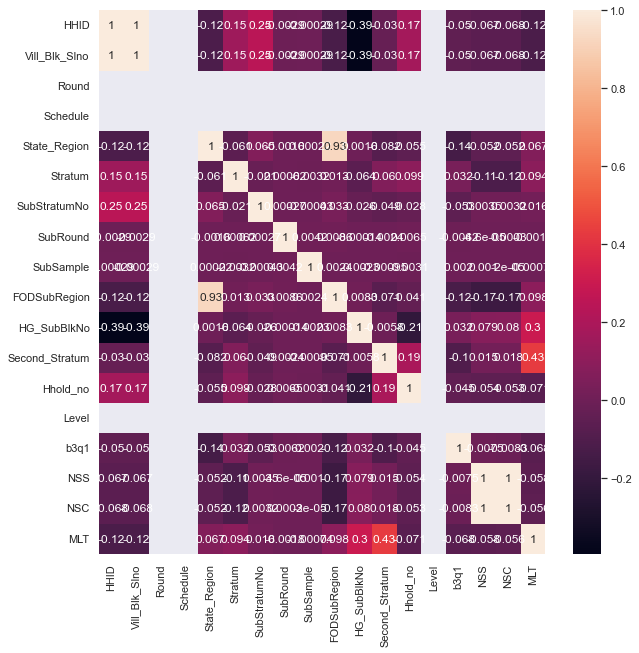

In [235]:
#check collinarity
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(10,10))  
ax =sns.heatmap(data.corr(), annot=True)


In [191]:
data=data.drop([ 'FSU Serial No.','Centre code,Round','FOD-Sub-Region','weight or multiplier within a substratum for the sub-sample','Final weight for sub-sample wise estimates','Final weight for sub-sample combined estimates'],  axis=1)

In [192]:
data

,‘Primary key - unique identifier for a household’,Round,Schedule,Sample,Sector,‘State-Region’,State,‘State-District’,Stratum,Sub-Stratum-no,Sub-Round,Sub-Sample,Hamlet group/Sub-block no.,Second-Stage-Stratum-no,Sample hhld. No.,‘Level 2-block 3’,Household size,NIC-2008 five digit code,NCO-2004 three digit code,Household type,Religion,‘Social group’,‘Whether owns any non-agricultural enterprise’,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.),number of first stage units surveyed within a substratum for the sub-sample,number of first stage units surveyed within a substratum for sub-sample combined
0,744471301,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,1,3,1,2,6,Construction of buildings carried out on own-a...,Mining and Construction Labourers,Rural : non-agriculture,Islam,others,no,no,9000,2,4
1,744471302,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,1,3,2,2,5,Construction of buildings carried out on own-a...,Mining and Construction Labourers,Rural : non-agriculture,Islam,others,no,no,10000,2,4
2,744471303,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,1,3,3,2,6,Growing of other cereals,Market Gardners & Crop Growers,Rural : non-agriculture,others,Scheduled Castes,no,yes,100000,2,4
3,744472301,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,2,3,1,2,8,Growing of other cereals,Market Gardners & Crop Growers,Rural : Self employed in : agriculture,Islam,Scheduled Tribes,yes,no,4000,2,4
4,744472302,72,15,Central,Rural,12,JAMMU & KASHMIR,Punch,5,1,1,2,2,3,2,2,9,Growing of other cereals,Market Gardners & Crop Growers,Rural : non-agriculture,Islam,Scheduled Tribes,no,no,7500,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83595,924591102,72,15,Central,Urban,351,A & N ISLANDS,South Andaman,3,9,4,2,1,1,2,2,5,Retail sale of jewellery and imitation jewellery,Directors and Chief Executives,Urban : Self - employed,Hinduism,others,yes,yes,25000,2,4
83596,924591201,72,15,Central,Urban,351,A & N ISLANDS,South Andaman,3,9,4,2,1,2,1,2,4,"Manufacture of doors, windows and their frames...","Metal Moulders, Welders, Sheet Metal Workers,...",Urban : Self - employed,Christianity,others,yes,yes,10000,2,4
83597,924591202,72,15,Central,Urban,351,A & N ISLANDS,South Andaman,3,9,4,2,1,2,2,2,4,Academic tutoring services,Secondary Education Teaching Professionals,Urban : Self - employed,Hinduism,others,yes,yes,8000,2,4
83598,924591301,72,15,Central,Urban,351,A & N ISLANDS,South Andaman,3,9,4,2,1,3,1,2,5,"Wholesale of toiletry, perfumery and cosmetics",Directors and Chief Executives,Urban : Self - employed,Christianity,others,yes,no,20000,2,4


In [193]:
#delete colums specific to sample codification, no necessary in the analisis
data.columns

Index(['‘Primary key - unique identifier for a household’', 'Round',
       'Schedule', 'Sample', 'Sector', '‘State-Region’', 'State',
       '‘State-District’', 'Stratum', 'Sub-Stratum-no', 'Sub-Round',
       'Sub-Sample', 'Hamlet group/Sub-block no.', 'Second-Stage-Stratum-no',
       'Sample hhld. No.', '‘Level 2-block 3’', 'Household size',
       'NIC-2008 five digit code', 'NCO-2004 three digit code',
       'Household type', 'Religion', '‘Social group’',
       '‘Whether owns any non-agricultural enterprise’',
       'Whether acquired any major durable goods',
       'Household usual monthly consumer expenditure(Rs.)',
       'number of first stage units surveyed within a substratum for the sub-sample',
       'number of first stage units surveyed within a substratum for sub-sample combined'],
      dtype='object')

In [194]:
data=data.drop(['Round','Schedule','‘State-Region’','‘State-District’', 'Sample', 'Sub-Round','Sub-Stratum-no', 'Sub-Sample', 'Stratum', 'Hamlet group/Sub-block no.','Second-Stage-Stratum-no', 'Sample hhld. No.','‘Level 2-block 3’','NIC-2008 five digit code','NCO-2004 three digit code','number of first stage units surveyed within a substratum for the sub-sample','number of first stage units surveyed within a substratum for sub-sample combined'],  axis=1)

In [195]:
data

,‘Primary key - unique identifier for a household’,Sector,State,Household size,Household type,Religion,‘Social group’,‘Whether owns any non-agricultural enterprise’,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.)
0,744471301,Rural,JAMMU & KASHMIR,6,Rural : non-agriculture,Islam,others,no,no,9000
1,744471302,Rural,JAMMU & KASHMIR,5,Rural : non-agriculture,Islam,others,no,no,10000
2,744471303,Rural,JAMMU & KASHMIR,6,Rural : non-agriculture,others,Scheduled Castes,no,yes,100000
3,744472301,Rural,JAMMU & KASHMIR,8,Rural : Self employed in : agriculture,Islam,Scheduled Tribes,yes,no,4000
4,744472302,Rural,JAMMU & KASHMIR,9,Rural : non-agriculture,Islam,Scheduled Tribes,no,no,7500
...,...,...,...,...,...,...,...,...,...,...
83595,924591102,Urban,A & N ISLANDS,5,Urban : Self - employed,Hinduism,others,yes,yes,25000
83596,924591201,Urban,A & N ISLANDS,4,Urban : Self - employed,Christianity,others,yes,yes,10000
83597,924591202,Urban,A & N ISLANDS,4,Urban : Self - employed,Hinduism,others,yes,yes,8000
83598,924591301,Urban,A & N ISLANDS,5,Urban : Self - employed,Christianity,others,yes,no,20000


In [196]:
#delete ' ' in coluùns labels
data.columns=data.columns.str.replace(r"[\‘\’]", '', regex=True)
data

,Primary key - unique identifier for a household,Sector,State,Household size,Household type,Religion,Social group,Whether owns any non-agricultural enterprise,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.)
0,744471301,Rural,JAMMU & KASHMIR,6,Rural : non-agriculture,Islam,others,no,no,9000
1,744471302,Rural,JAMMU & KASHMIR,5,Rural : non-agriculture,Islam,others,no,no,10000
2,744471303,Rural,JAMMU & KASHMIR,6,Rural : non-agriculture,others,Scheduled Castes,no,yes,100000
3,744472301,Rural,JAMMU & KASHMIR,8,Rural : Self employed in : agriculture,Islam,Scheduled Tribes,yes,no,4000
4,744472302,Rural,JAMMU & KASHMIR,9,Rural : non-agriculture,Islam,Scheduled Tribes,no,no,7500
...,...,...,...,...,...,...,...,...,...,...
83595,924591102,Urban,A & N ISLANDS,5,Urban : Self - employed,Hinduism,others,yes,yes,25000
83596,924591201,Urban,A & N ISLANDS,4,Urban : Self - employed,Christianity,others,yes,yes,10000
83597,924591202,Urban,A & N ISLANDS,4,Urban : Self - employed,Hinduism,others,yes,yes,8000
83598,924591301,Urban,A & N ISLANDS,5,Urban : Self - employed,Christianity,others,yes,no,20000


In [197]:
#renam
data.rename(columns={"Social group": "Cast&class"}, inplace=True)

In [198]:
## Check for duplicates
data.duplicated().any()

False

In [199]:
data.shape

(83600, 10)

In [200]:
data.dtypes

Primary key - unique identifier for a household       int64
Sector                                               object
State                                                object
Household size                                        int64
Household type                                       object
Religion                                             object
Cast&class                                           object
Whether owns any non-agricultural enterprise         object
Whether acquired any major durable goods             object
Household usual monthly consumer expenditure(Rs.)    object
dtype: object

In [201]:
data['Household usual monthly consumer expenditure(Rs.)'] = pd.to_numeric(data["Household usual monthly consumer expenditure(Rs.)"], errors='coerce')

In [202]:
data.head()

,Primary key - unique identifier for a household,Sector,State,Household size,Household type,Religion,Cast&class,Whether owns any non-agricultural enterprise,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.)
0,744471301,Rural,JAMMU & KASHMIR,6,Rural : non-agriculture,Islam,others,no,no,9000.0
1,744471302,Rural,JAMMU & KASHMIR,5,Rural : non-agriculture,Islam,others,no,no,10000.0
2,744471303,Rural,JAMMU & KASHMIR,6,Rural : non-agriculture,others,Scheduled Castes,no,yes,100000.0
3,744472301,Rural,JAMMU & KASHMIR,8,Rural : Self employed in : agriculture,Islam,Scheduled Tribes,yes,no,4000.0
4,744472302,Rural,JAMMU & KASHMIR,9,Rural : non-agriculture,Islam,Scheduled Tribes,no,no,7500.0


# work on Household type
12	Rural : non-agriculture	18631	 22.3%
13	Rural : Regular wage/salary earning	3633	 4.3%
14	Rural : Casual labour in : agriculture	4949	 5.9%
15	Rural : non-agriculture	4267	 5.1%
19	Rural : others	1671	 2.0%
21	Urban : Self - employed	20925	 25.0%
22	Urban : regular wage/salary earning	9394	 11.2%
23	Urban : Casual labour	3151	 3.8%
29	Urban : Others

In [203]:
data['Household type'].unique()

array(['Rural : non-agriculture',
       'Rural : Self employed in : agriculture', 'Rural : others',
       'Rural : Regular wage/salary earning',
       'Rural : Casual labour in : agriculture',
       'Urban : Self - employed', 'Urban : regular wage/salary earning',
       'Urban : Others', 'Urban : Casual labour'], dtype=object)

In [204]:
data['Household type'] = data['Household type'].replace(['Rural : non-agriculture'],'Self_non-agriculture')
data['Household type'] = data['Household type'].replace(['Rural : Self employed in : agriculture'],'Self_agriculture')
data['Household type'] = data['Household type'].replace(['Rural : others'],'others')
data['Household type'] = data['Household type'].replace(['Rural : Regular wage/salary earning'],'Salary')
data['Household type'] = data['Household type'].replace(['Rural : Casual labour in : agriculture'],'Casual')
data['Household type'] = data['Household type'].replace(['Urban : Self - employed'],'Self_non-agriculture')
data['Household type'] = data['Household type'].replace(['Urban : regular wage/salary earning'],'Salary')
data['Household type'] = data['Household type'].replace(['Urban : Casual labour'],'Casual')
data['Household type'] = data['Household type'].replace(['Urban : Others'],'others')

In [205]:
#duplicate with columns: Whether owns any non-agricultural enterprise, then drop
data.drop(columns=['Whether owns any non-agricultural enterprise'], inplace=True)

In [206]:
## Missing data check
data.isna().sum()

Primary key - unique identifier for a household      0
Sector                                               0
State                                                0
Household size                                       0
Household type                                       0
Religion                                             0
Cast&class                                           0
Whether acquired any major durable goods             0
Household usual monthly consumer expenditure(Rs.)    8
dtype: int64

In [207]:
data = data.dropna()

In [208]:
data

,Primary key - unique identifier for a household,Sector,State,Household size,Household type,Religion,Cast&class,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.)
0,744471301,Rural,JAMMU & KASHMIR,6,Self_non-agriculture,Islam,others,no,9000.0
1,744471302,Rural,JAMMU & KASHMIR,5,Self_non-agriculture,Islam,others,no,10000.0
2,744471303,Rural,JAMMU & KASHMIR,6,Self_non-agriculture,others,Scheduled Castes,yes,100000.0
3,744472301,Rural,JAMMU & KASHMIR,8,Self_agriculture,Islam,Scheduled Tribes,no,4000.0
4,744472302,Rural,JAMMU & KASHMIR,9,Self_non-agriculture,Islam,Scheduled Tribes,no,7500.0
...,...,...,...,...,...,...,...,...,...
83595,924591102,Urban,A & N ISLANDS,5,Self_non-agriculture,Hinduism,others,yes,25000.0
83596,924591201,Urban,A & N ISLANDS,4,Self_non-agriculture,Christianity,others,yes,10000.0
83597,924591202,Urban,A & N ISLANDS,4,Self_non-agriculture,Hinduism,others,yes,8000.0
83598,924591301,Urban,A & N ISLANDS,5,Self_non-agriculture,Christianity,others,no,20000.0


In [209]:
## Data inconsistency check
data.describe()

,Primary key - unique identifier for a household,Household size,Household usual monthly consumer expenditure(Rs.)
count,8.359200e+04,83592.000000,8.359200e+04
mean,8.397048e+08,4.673844,9.913243e+03
std,1.072083e+08,2.229233,1.238500e+04
min,7.000011e+08,1.000000,1.000000e+00
25%,7.396013e+08,3.000000,5.000000e+03
50%,7.895813e+08,4.000000,8.000000e+03
75%,9.484115e+08,6.000000,1.200000e+04
max,9.999513e+08,40.000000,1.300000e+06


<Figure size 720x432 with 0 Axes>

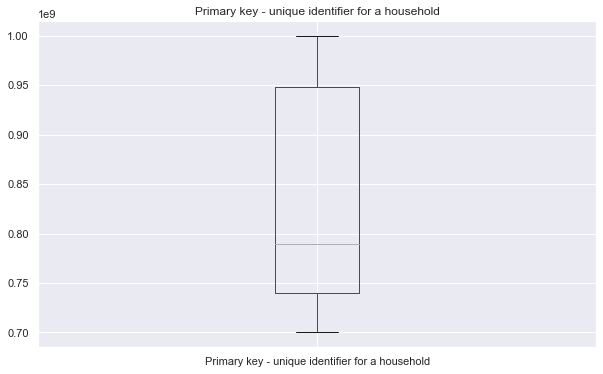

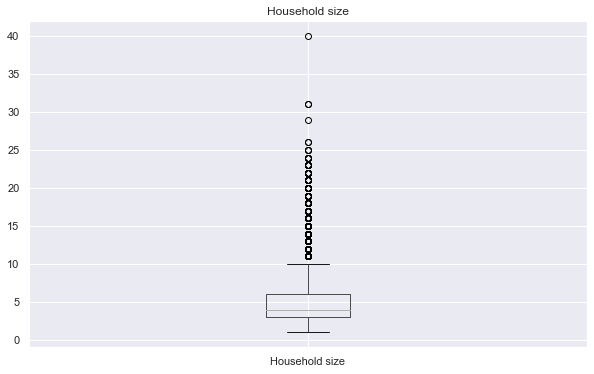

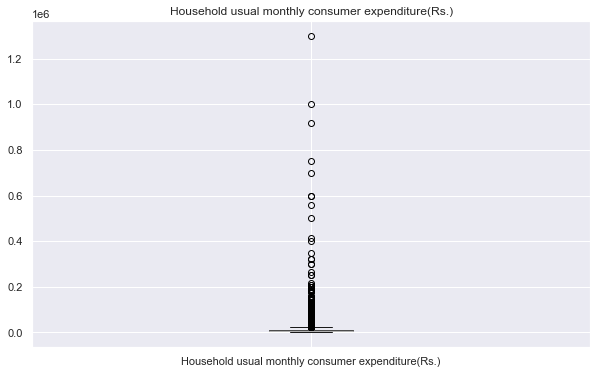

In [210]:
#Check Outliers
num_df = data.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    data.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [211]:
#We can see there are some outliers in Household size so we check these rows to knows how many is there
data[(data['Household size'] >20)].shape

(41, 9)

In [212]:
#there is only 41 family on 83600: so we decide to drop them  ( but after concat other dataset)
data = data.drop(data[data['Household size'] >20].index)


In [213]:
#We drop outliers and keep under 400 000 roupies (around 5000 euros)
data = data.drop(data[data['Household usual monthly consumer expenditure(Rs.)'] >400000].index) 


In [214]:
data.shape


(83541, 9)

In [215]:
data

,Primary key - unique identifier for a household,Sector,State,Household size,Household type,Religion,Cast&class,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.)
0,744471301,Rural,JAMMU & KASHMIR,6,Self_non-agriculture,Islam,others,no,9000.0
1,744471302,Rural,JAMMU & KASHMIR,5,Self_non-agriculture,Islam,others,no,10000.0
2,744471303,Rural,JAMMU & KASHMIR,6,Self_non-agriculture,others,Scheduled Castes,yes,100000.0
3,744472301,Rural,JAMMU & KASHMIR,8,Self_agriculture,Islam,Scheduled Tribes,no,4000.0
4,744472302,Rural,JAMMU & KASHMIR,9,Self_non-agriculture,Islam,Scheduled Tribes,no,7500.0
...,...,...,...,...,...,...,...,...,...
83595,924591102,Urban,A & N ISLANDS,5,Self_non-agriculture,Hinduism,others,yes,25000.0
83596,924591201,Urban,A & N ISLANDS,4,Self_non-agriculture,Christianity,others,yes,10000.0
83597,924591202,Urban,A & N ISLANDS,4,Self_non-agriculture,Hinduism,others,yes,8000.0
83598,924591301,Urban,A & N ISLANDS,5,Self_non-agriculture,Christianity,others,no,20000.0


In [216]:
##Exporting File before encoding
file_url2 = r'C:\Users\Lenovo\Documents\INDE DATA\INDIACASTERELIGION.csv'
data.to_csv(file_url2,index = False)

In [217]:
import pandas as pd # creat before the name of database on mysql (projectindia, then execute)
import mysql.connector 
import sqlalchemy

database_username = 'root'
database_password = '123rout&'
database_ip       = '127.0.0.1'
database_name     = 'projectINDIA'

database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name), pool_recycle=1, pool_timeout=57600).connect()

data.to_sql(con=database_connection, name='region_caste', if_exists='append',chunksize=220)
database_connection.close()

ProgrammingError: (mysql.connector.errors.ProgrammingError) 1054 (42S22): Unknown column 'Cast&class' in 'field list'
[SQL: INSERT INTO region_caste (`index`, `Primary key - unique identifier for a household`, `Sector`, `State`, `Household size`, `Household type`, `Religion`, `Cast&class`, `Whether acquired any major durable goods`, `Household usual monthly consumer expenditure(Rs.)`) VALUES (%(index)s, %(Primary key - unique identifier for a household)s, %(Sector)s, %(State)s, %(Household size)s, %(Household type)s, %(Religion)s, %(Cast&class)s, %(Whether acquired any major durable goods)s, %(Household usual monthly consumer expenditureARs.Z)s)]
[parameters: ({'index': 0, 'Primary key - unique identifier for a household': 744471301, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 6, 'Household type': 'Self_non-agriculture', 'Religion': 'Islam', 'Cast&class': 'others', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 9000.0}, {'index': 1, 'Primary key - unique identifier for a household': 744471302, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 5, 'Household type': 'Self_non-agriculture', 'Religion': 'Islam', 'Cast&class': 'others', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 10000.0}, {'index': 2, 'Primary key - unique identifier for a household': 744471303, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 6, 'Household type': 'Self_non-agriculture', 'Religion': 'others', 'Cast&class': 'Scheduled Castes', 'Whether acquired any major durable goods': 'yes', 'Household usual monthly consumer expenditureARs.Z': 100000.0}, {'index': 3, 'Primary key - unique identifier for a household': 744472301, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 8, 'Household type': 'Self_agriculture', 'Religion': 'Islam', 'Cast&class': 'Scheduled Tribes', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 4000.0}, {'index': 4, 'Primary key - unique identifier for a household': 744472302, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 9, 'Household type': 'Self_non-agriculture', 'Religion': 'Islam', 'Cast&class': 'Scheduled Tribes', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 7500.0}, {'index': 5, 'Primary key - unique identifier for a household': 744472303, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 2, 'Household type': 'others', 'Religion': 'Islam', 'Cast&class': 'Scheduled Tribes', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 2500.0}, {'index': 6, 'Primary key - unique identifier for a household': 744491301, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 6, 'Household type': 'Self_agriculture', 'Religion': 'Islam', 'Cast&class': 'others', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 12000.0}, {'index': 7, 'Primary key - unique identifier for a household': 744491302, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 6, 'Household type': 'Self_agriculture', 'Religion': 'Islam', 'Cast&class': 'Scheduled Tribes', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 8000.0}  ... displaying 10 of 220 total bound parameter sets ...  {'index': 218, 'Primary key - unique identifier for a household': 744822101, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 6, 'Household type': 'Self_non-agriculture', 'Religion': ' Hinduism', 'Cast&class': 'Scheduled Castes', 'Whether acquired any major durable goods': 'yes', 'Household usual monthly consumer expenditureARs.Z': 12000.0}, {'index': 219, 'Primary key - unique identifier for a household': 744822301, 'Sector': 'Rural', 'State': 'JAMMU & KASHMIR', 'Household size': 4, 'Household type': 'Self_non-agriculture', 'Religion': ' Hinduism', 'Cast&class': 'others', 'Whether acquired any major durable goods': 'no', 'Household usual monthly consumer expenditureARs.Z': 8000.0})]
(Background on this error at: https://sqlalche.me/e/14/f405)

In [224]:
data ['Cast&class'].value_counts()

Other  Backward Classes    33418
others                     26402
Scheduled Castes           12300
Scheduled Tribes           11421
Name: Cast&class, dtype: int64

<AxesSubplot:>

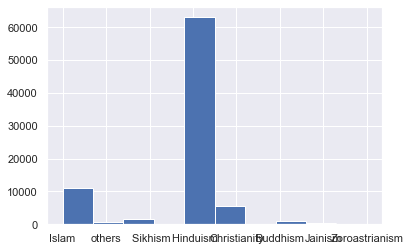

In [225]:
data ['Religion'].hist()

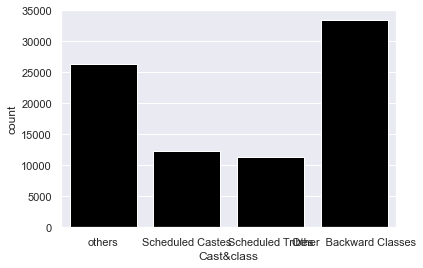

In [232]:
sns.countplot(x='Cast&class', data=data, color='black')
plt.show()

<AxesSubplot:>

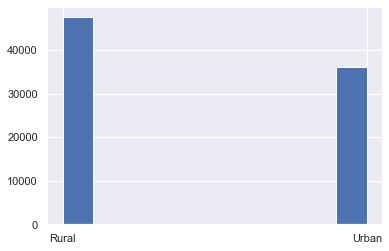

In [226]:
data ['Sector'].hist()

In [227]:
data_group = data.groupby(['Religion']).mean()
data_group 

,Primary key - unique identifier for a household,Household size,Household usual monthly consumer expenditure(Rs.)
Religion,,,
Hinduism,8.372827e+08,4.560610,9665.672076
Sikhism,8.278962e+08,4.881782,14147.581953
Buddhism,8.228285e+08,4.513636,8821.369318
Christianity,8.455780e+08,4.648266,10637.049717
Islam,8.508517e+08,5.218705,9424.208091
Jainism,9.208409e+08,4.849727,18576.040984
Zoroastrianism,8.851664e+08,3.550000,16254.250000
others,8.404869e+08,4.962779,8711.905707


In [228]:
data_group = data.groupby(['Cast&class']).mean()
data_group 

,Primary key - unique identifier for a household,Household size,Household usual monthly consumer expenditure(Rs.)
Cast&class,,,
Other Backward Classes,8.322020e+08,4.735083,9136.468909
Scheduled Castes,8.195314e+08,4.646016,7799.928537
Scheduled Tribes,8.177473e+08,4.773838,8457.462044
others,8.680636e+08,4.536550,12202.976820


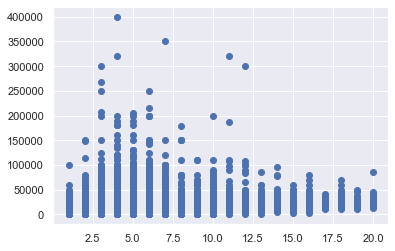

In [229]:

fig, ax = plt.subplots()

plt.scatter(data=data, x='Household size', y='Household usual monthly consumer expenditure(Rs.)', cmap='viridis')

plt.show()

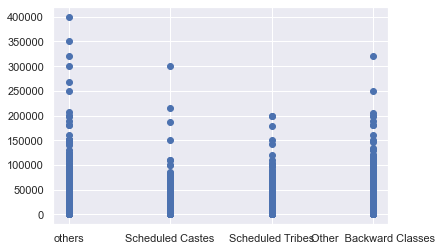

In [230]:

fig, ax = plt.subplots()

plt.scatter(data=data, x='Cast&class', y='Household usual monthly consumer expenditure(Rs.)', cmap='viridis')

plt.show()

In [231]:
data_group = data.groupby(['Religion','Cast&class']).mean()
data_group 

Primary key - unique identifier for a household  \
Religion       Cast&class                                                                 
 Hinduism      Other  Backward Classes                                     8.273076e+08   
               Scheduled Castes                                            8.204435e+08   
               Scheduled Tribes                                            7.885579e+08   
               others                                                      8.757628e+08   
 Sikhism       Other  Backward Classes                                     8.217615e+08   
               Scheduled Castes                                            7.950382e+08   
               Scheduled Tribes                                            8.555626e+08   
               others                                                      8.532877e+08   
Buddhism       Other  Backward Classes                                     8.228910e+08   
               Scheduled Castes                                            8.269849e+08   
               Scheduled Tribes                                            8.209604e+08   
               others                                                      8.188885e+08   
Christianity   Other  Backward Classes                                     8.372085e+08   
               Scheduled Castes                                            8.110941e+08   
               Scheduled Tribes                                            8.554577e+08   
               others                                                      8.097627e+08   
Islam          Other  Backward Classes                                     8.553674e+08   
               Scheduled Castes                                            8.426015e+08   
               Scheduled Tribes                                            8.324429e+08   
               others                                                      8.476278e+08   
Jainism        Other  Backward Classes                                     8.768882e+08   
               Scheduled Castes                                            7.492918e+08   
               Scheduled Tribes                                            8.339543e+08   
               others                                                      9.324553e+08   
Zoroastrianism Other  Backward Classes                                     9.783913e+08   
               Scheduled Tribes                                            9.059804e+08   
               others                                                      8.361672e+08   
others         Other  Backward Classes                                     9.187890e+08   
               Scheduled Castes                                            8.097945e+08   
               Scheduled Tribes                                            8.314615e+08   
               others                                                      8.939523e+08   

                                        Household size  \
Religion       Cast&class                                
 Hinduism      Other  Backward Classes        4.614950   
               Scheduled Castes               4.633713   
               Scheduled Tribes               4.601611   
               others                         4.429895   
 Sikhism       Other  Backward Classes        5.146789   
               Scheduled Castes               4.931857   
               Scheduled Tribes               4.333333   
               others                         4.752137   
Buddhism       Other  Backward Classes        4.551020   
               Scheduled Castes               4.485915   
               Scheduled Tribes               4.501066   
               others                         4.666667   
Christianity   Other  Backward Classes        3.946875   
               Scheduled Castes               4.452229   
               Scheduled Tribes               4.924771   
               others                         3.86